<a href="https://colab.research.google.com/github/marcosilvaa/dados_estudos/blob/main/Visualiza%C3%A7%C3%A3o_Gr%C3%A1fica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualização Gráfica

Para um bom projeto de *DataScience*, a visualização gráfica é um dos requisitos mais importantes, uma vez que a função do gráfico é comunicar uma informação, deve ser feito de maneira clara e direta. 

Este notebook é uma sequência de tutoriais sobre como fazer os mais diversos tipos de gráficos, os dados utilizados são do curso *Data Science na Prática* do professor Carlos Melo da Familia [Sigmoidal](https://sigmoidal.ai). 


In [2]:
# importando pacotes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

## Gráfico de Linhas 

O gráfico de linhas é formado por um conjunto de pontos conectados por segmentos de retas, utilizando de um eixo X (horizontal) e um eixo Y (vertical), este tipo gráfico é ideal para nos mostrar comportamento dos dados ao longo do tempo.


### Quando Usar? 
Para dados que se conectam e apresentam uma continuídade.

### Dicas

* Frequentemente o eixo X é uma unidade de tempo.

* Não faz sentido para variáveis categóricas

* Princípio da conexão de Gestalt
> "A Gestalt diz que elementos que estão visualmente conectados são percebidos como mais relacionados do que elementos sem conexão. Isso significa que 2 figuras idênticas em um layout, quando desconectadas, são vistas diferentemente do que as suas figuras disformes ligadas por uma linha.
De todos os princípios que sugerem que os objetos estão relacionados, a conexão uniforme tende a ser o mais forte."

### Plotando Gráfico de Linhas

Para este gráfico utilizaremos um conjunto de dados referentes ao número de casos mensais de dengue na cidade de Campinas-SP, dados referentes ao período de 1998 a 2015.

Este *dataset* contem informações como:
* Número de casos confirmados 
* Chuva
* Temperaturas (Mín, Méd, Máx)





In [2]:
# importando dados
data = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/dengue-dataset.csv"
df_dengue  = pd.read_csv(data, index_col = "data", parse_dates=True)

# conferindo as primeiras entradas
df_dengue.head()

,casos-confirmados,chuva,temperatura-media,temperatura-mininima,temperatura-maxima
data,,,,,
1998-01-01,237,179.2,25.7,20.2,28.1
1998-02-01,331,226.3,25.1,20.0,28.0
1998-03-01,562,149.1,24.8,22.4,27.2
1998-04-01,187,46.4,22.7,18.1,26.0
1998-05-01,32,88.3,19.2,15.7,22.9


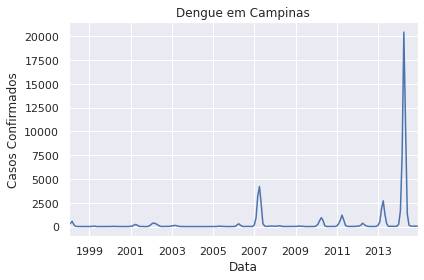

In [3]:
# plotando numero de casos confirmados
fig, ax = plt.subplots()

df_dengue['casos-confirmados'].plot(kind='line', ax=ax)
ax.set_title("Dengue em Campinas")
ax.set_ylabel("Casos Confirmados")
ax.set_xlabel("Data")

plt.tight_layout()

### Selecionando intervalos

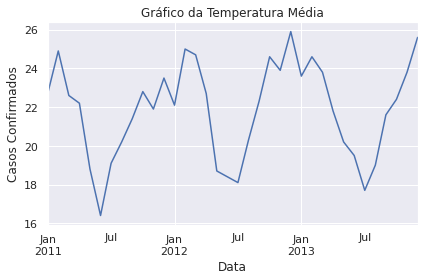

In [4]:
# plotando histograma da temperatura média
fig, ax = plt.subplots()
#              intervalo               data            plotando
df_dengue.loc['2011-01-01':'2013-12-31','temperatura-media'].plot(kind='line', ax=ax)
ax.set_title("Gráfico da Temperatura Média")
ax.set_ylabel("Casos Confirmados")
ax.set_xlabel('Data')

plt.tight_layout()

### Plotando múltiplos gráficos separadamente

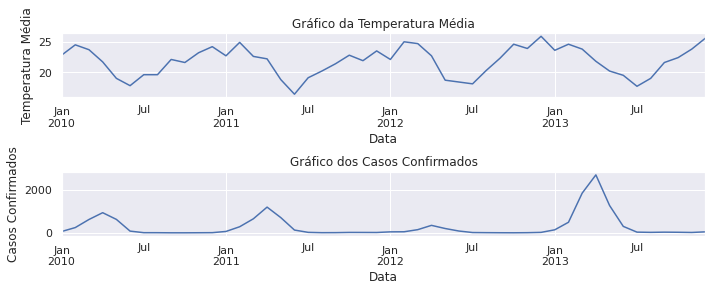

In [5]:
# plotar o histograma da temperatura média 
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(10,4))

# plotar temperatura média como ax0
df_dengue.loc['2010-01-01':'2013-12-31', 'temperatura-media'].plot(kind='line', ax=ax0)
ax0.set_title('Gráfico da Temperatura Média')
ax0.set_ylabel('Temperatura Média')
ax0.set_xlabel('Data')

# plotar casos confirmados como ax1
df_dengue.loc['2010-01-01':'2013-12-31', 'casos-confirmados'].plot(kind='line', ax=ax1)
ax1.set_title("Gráfico dos Casos Confirmados")
ax1.set_ylabel("Casos Confirmados")
ax1.set_xlabel("Data")

plt.tight_layout()

### Plotando múltiplos gráficos sobrepostos


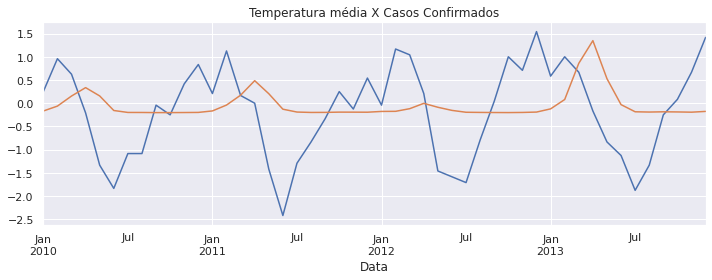

In [6]:
# plotando gráficos normalizados
df_norm = (df_dengue - df_dengue.mean()) / df_dengue.std()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))

# plotar temperatura média
df_norm.loc['2010-01-01':'2013-12-31', 'temperatura-media'].plot(kind='line', ax=ax)

# plotar casos confirmados
df_norm.loc['2010-01-01':'2013-12-31', 'casos-confirmados'].plot(kind='line', ax=ax)

# nomeando eixo-x e title
ax.set_xlabel('Data')
ax.set_title('Temperatura média X Casos Confirmados')

plt.tight_layout()

## Histograma

Diferente de um gráfico de barras comum, o histograma é utilizado para demonstrar a distribuição de frequência ou a quantidade de um determinado ítem. 

Um histograma de valores absolutos, tem no eixo y a quantidade absoluta de ocorrências dos valores de cada classe. Já um histograma de dados de proporção, conhecido como histograma de área de unidade, exibe a proporção que cada classe representa no todo.


### Plotando o histograma
Vamos continuar utilizando os dados referentes aos casos de dengue em Campinas-SP.

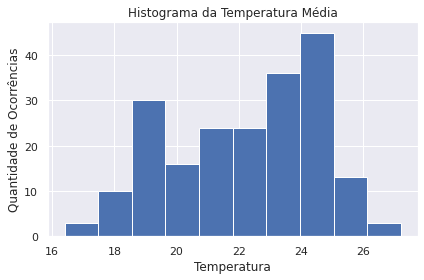

In [7]:
# plotar histograma para temperatura média

fig, ax = plt.subplots()

ax.hist("temperatura-media", data=df_dengue)
ax.set_title("Histograma da Temperatura Média")
ax.set_ylabel("Quantidade de Ocorrências")
ax.set_xlabel("Temperatura")

plt.tight_layout()

O histograma acima está representando os valores absolutos no eixo y. Para plotar em termos de frequência relativa, acrescenta-se density=True dentro da função.

A quantidade de barras (`bins`) tem seu valor padrão, porém pode ser alterada para buscar uma maior acurácia no resultado

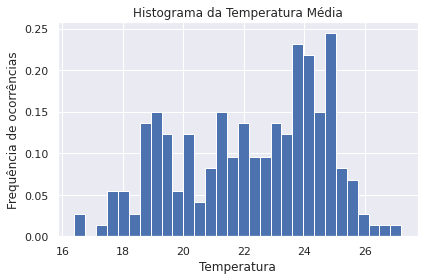

In [8]:
# plotar o histograma da temperatura média
fig, ax = plt.subplots()

# density altera os valores para o eixo y
ax.hist('temperatura-media', data=df_dengue, density=True, bins=30) 
ax.set_title("Histograma da Temperatura Média")
ax.set_ylabel("Frequência de ocorrências")
ax.set_xlabel("Temperatura")

plt.tight_layout()

## Gráfico de Barras

o Gráfico de barras diferente do histograma, indica atraves do comprimento ou altura, dependendo de sua orientação, um valor proporcional àquilo que busca representar, a particularidade do histograma é de representar o historico de um determinado evento, já no gráfico de barras a idéia é de apenas representar um valor.

De maneira simples, cumpre com seu papel de informar um dado de maneira direta porém discreta. Apresenta uma fácil interpretação do leitor, exige menos processamento de informação. 

O gráfico de barras parte de um ponto zero, podendo informar simultaneamente valores positivos e negativos, o que deve ser feito com cautela para que não fuja da sua simplicidade, uma vez que pode ser plotado com um número grande de barras e excesso de legendas.

### Plotando Gráfico de Barras

Para este exemplo, utilizaremos um conjunto de dados públicos referentes ao Metrô de São Paulo.

Este *dataset* assim como diversos outros podem ser encontrados no [Portal da Governança Corporativa e Transparência](https://transparencia.metrosp.com.br/). Neste portal é possível encontrar dados referentes à evolução de obras, gestão financeira, projetos futuros.

O *dataset* a ser utilizado é "Entrada de Passageiros por Estação - Média Dias Úteis - Dezembro/2018". Mesmo com os dados já disponíveis em `.csv`, foi necessário realizar um trabalho em cima das informações, e mais uma vez quem ficou responsável por este feito, foi o professor Carlos Melo da Familia [Sigmoidal](https://sigmoidal.ai), que nos disponibilizou o arquivo já estruturado [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/entrada_passageiro_linha1.csv).



In [9]:
# importando pacotes   
import pandas as pd
import matplotlib.pyplot as plt

# importando os dados
data_metro = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/entrada_passageiro_linha1.csv"
df_metro = pd.read_csv(data_metro)

#conferindo as primeiras entradas
df_metro.head()

,Estação,Entradas
0,Jabaquara,90.0
1,Conceição,40.0
2,São Judas,20.0
3,Saúde,36.0
4,Praça da Árvore,22.0


In [10]:
# conferindo as ultimas entradas
df_metro.tail()

,Estação,Entradas
19,Santana,64.000
20,Jardim São Paulo-Ayrton Senna,14.000
21,Parada Inglesa,16.000
22,Tucuruvi,70.000
23,TOTAL,1.425


A ultima linha deste *dataset* informa o valor da soma total de todas as entradas, o que não nos trás benefício para o exemplo em questão, portanto vamos apagá-la.

In [11]:
# apagando linha `TOTAL`
df_metro.drop(index=23, axis=0, inplace=True)

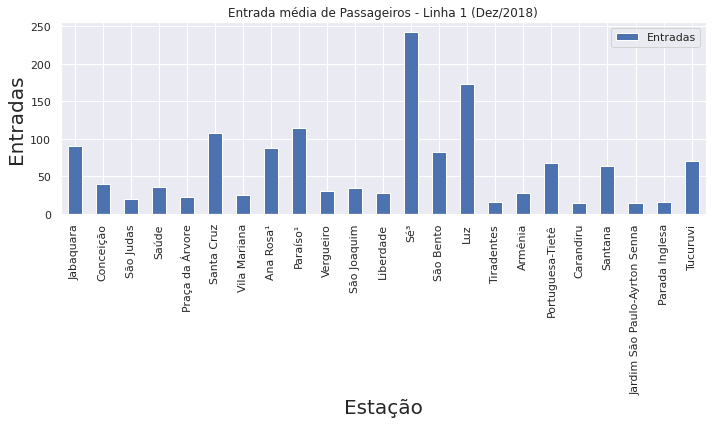

In [12]:

# plotando gráfico de barras com a entrada média dos passageiros
fig, ax = plt.subplots(figsize=(10,6))

df_metro.plot(x='Estação', y='Entradas', kind='bar', ax=ax)

ax.set_title("Entrada média de Passageiros - Linha 1 (Dez/2018)")
ax.set_xlabel("Estação", fontsize=20)
ax.set_ylabel("Entradas", fontsize=20)

plt.tight_layout()

Agora em outro exemplo, vamos utilizar um conjunto de dados de uma pesquisa feita pela Data Hackers, a respeito da situação do Data Science no Brasil em 2019. 

A pesquisa conta com 36 perguntas, os dados foram disponibilizados na plataforma Kaggle, preservando o anonimato dos participantes.

In [13]:
# importando dataset 
data_pesquisa = "https://www.dropbox.com/s/ttho30qxqe47j43/datahackers-survey-2019-anonymous-responses.csv?dl=1"
df_pesquisa = pd.read_csv(data_pesquisa)

#conferindo as primeiras entradas
df_pesquisa.head()

,"('P0', 'id')","('P1', 'age')","('P2', 'gender')","('P3', 'living_in_brasil')","('P5', 'living_state')","('P6', 'born_or_graduated')","('P8', 'degreee_level')","('P10', 'job_situation')","('P12', 'workers_number')","('P13', 'manager')",...,"('P34', 'other')","('P35', 'data_science_plataforms_preference')","('P35', 'other')","('P36', 'draw_participation')","('D1', 'living_macroregion')","('D2', 'origin_macroregion')","('D3', 'anonymized_degree_area')","('D4', 'anonymized_market_sector')","('D5', 'anonymized_manager_level')","('D6', 'anonymized_role')"
0,v9otv8j9wdvjrv9otvwnn9owhzq54ktv,37.0,Masculino,1,Minas Gerais (MG),1.0,Estudante de Graduação,Empregado (CTL),de 1 a 5,0.0,...,0,Nunca fiz cursos online,NaN,1.0,Região Sudeste,NaN,Computação / Engenharia de Software / Sistemas...,Outras,NaN,Outras
1,875ul998t0hqcv0871uptwf3oswcfv35,24.0,Feminino,1,São Paulo (SP),1.0,Estudante de Graduação,Empregado (CTL),Acima de 3000,0.0,...,1,NaN,Data Science Academy,0.0,Região Sudeste,NaN,Computação / Engenharia de Software / Sistemas...,Educação,NaN,Data Analyst/Analista de Dados
2,puscuk079vw1pusbb900pzw2xvpxtgdk,26.0,Masculino,1,São Paulo (SP),1.0,Graduação/Bacharelado,Empregado (CTL),Acima de 3000,0.0,...,0,Udemy,NaN,1.0,Região Sudeste,NaN,Outras Engenharias,Indústria (Manufatura),NaN,Outras
3,rmel8ewqpbffp2mnfbzermel8eqincov,21.0,Masculino,1,São Paulo (SP),0.0,Estudante de Graduação,Estagiário,de 11 a 50,0.0,...,0,Alura,NaN,1.0,Região Sudeste,Região Sudeste,Computação / Engenharia de Software / Sistemas...,Tecnologia/Fábrica de Software,NaN,Business Intelligence/Analista de BI
4,pj9mgud4d6mdct1l7vq0pj9mgu78h6ju,27.0,Masculino,1,NaN,1.0,Graduação/Bacharelado,Freelancer,de 6 a 10,1.0,...,0,Udemy,NaN,1.0,NaN,NaN,Computação / Engenharia de Software / Sistemas...,Internet/Ecommerce,"C-level (CDO, CIO, CTO)",NaN


Como podemos observar, o nome das colunas encontram-se em uma tupla contendo o código e o nome, vamos alterar e deixar apenas o nome de cada coluna.

In [14]:
# extraindo o nome da variável da tupla
df_pesquisa.columns = [eval(col)[1] for col in df_pesquisa.columns]


In [15]:
# conferindo as primeiras entradas
df_pesquisa.head()

,id,age,gender,living_in_brasil,living_state,born_or_graduated,degreee_level,job_situation,workers_number,manager,...,other,data_science_plataforms_preference,other,draw_participation,living_macroregion,origin_macroregion,anonymized_degree_area,anonymized_market_sector,anonymized_manager_level,anonymized_role
0,v9otv8j9wdvjrv9otvwnn9owhzq54ktv,37.0,Masculino,1,Minas Gerais (MG),1.0,Estudante de Graduação,Empregado (CTL),de 1 a 5,0.0,...,0,Nunca fiz cursos online,NaN,1.0,Região Sudeste,NaN,Computação / Engenharia de Software / Sistemas...,Outras,NaN,Outras
1,875ul998t0hqcv0871uptwf3oswcfv35,24.0,Feminino,1,São Paulo (SP),1.0,Estudante de Graduação,Empregado (CTL),Acima de 3000,0.0,...,1,NaN,Data Science Academy,0.0,Região Sudeste,NaN,Computação / Engenharia de Software / Sistemas...,Educação,NaN,Data Analyst/Analista de Dados
2,puscuk079vw1pusbb900pzw2xvpxtgdk,26.0,Masculino,1,São Paulo (SP),1.0,Graduação/Bacharelado,Empregado (CTL),Acima de 3000,0.0,...,0,Udemy,NaN,1.0,Região Sudeste,NaN,Outras Engenharias,Indústria (Manufatura),NaN,Outras
3,rmel8ewqpbffp2mnfbzermel8eqincov,21.0,Masculino,1,São Paulo (SP),0.0,Estudante de Graduação,Estagiário,de 11 a 50,0.0,...,0,Alura,NaN,1.0,Região Sudeste,Região Sudeste,Computação / Engenharia de Software / Sistemas...,Tecnologia/Fábrica de Software,NaN,Business Intelligence/Analista de BI
4,pj9mgud4d6mdct1l7vq0pj9mgu78h6ju,27.0,Masculino,1,NaN,1.0,Graduação/Bacharelado,Freelancer,de 6 a 10,1.0,...,0,Udemy,NaN,1.0,NaN,NaN,Computação / Engenharia de Software / Sistemas...,Internet/Ecommerce,"C-level (CDO, CIO, CTO)",NaN


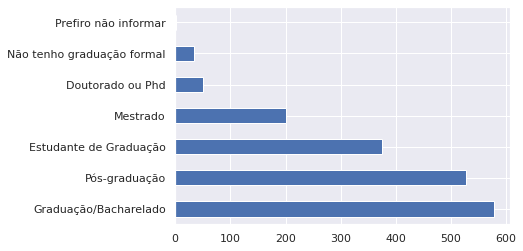

In [16]:
# plotar escolaridade 
df_pesquisa.degreee_level.value_counts().plot(kind='barh')

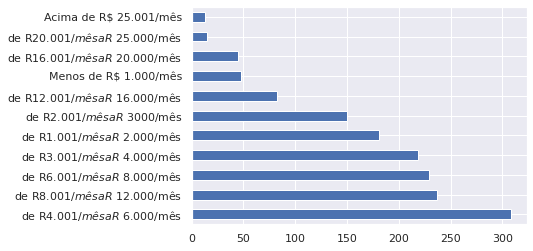

In [17]:
# plotando gráfico para variação de salários
df_pesquisa.salary_range.value_counts().plot(kind='barh')

## Boxplot

Também conhecido como diagrama de caixa, é uma ferramenta estatística que representa a variação de uma variável utilizando quartis, e nos permite observar valores discrepantes, os chamados *Outliers*, sendo um complemento na hora da análise dos dados de forma também gráfica. 

<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c9/Elements_of_a_boxplot_pt.svg/2560px-Elements_of_a_boxplot_pt.svg.png"width="450px"></center>

Boxplot pode ser usado para se estudar diferentes características do conjunto de dados, como por exemplo, para determinar a simetria dos dados basta observar se a média é igual ou próxima à mediana. 

Em uma etapa de limpeza dos dados, o boxplot nos mostra os *outliers*, valores que fogem desse padrão estatísticos e podem ser eliminados ou tratados em nosso conjunto de dados. 



### Plotando o boxplot

Aqui utilizaremos novamente o conjunto de dados relacionados aos casos de Dengue na cidade de Campinas-SP. Utilizaremos os dados de temperatura. 


In [18]:
# conferindo as primeiras entradas
df_dengue.head()

,casos-confirmados,chuva,temperatura-media,temperatura-mininima,temperatura-maxima
data,,,,,
1998-01-01,237,179.2,25.7,20.2,28.1
1998-02-01,331,226.3,25.1,20.0,28.0
1998-03-01,562,149.1,24.8,22.4,27.2
1998-04-01,187,46.4,22.7,18.1,26.0
1998-05-01,32,88.3,19.2,15.7,22.9


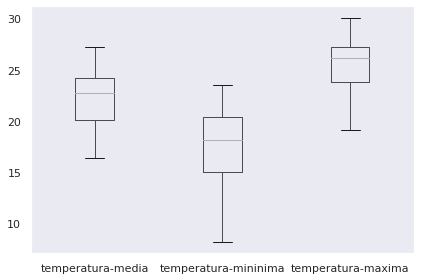

In [19]:
# plotando boxplot para temperatura
fig, ax = plt.subplots()

df_dengue.boxplot(['temperatura-media', 'temperatura-mininima', 'temperatura-maxima'],
                  grid=False,
                  ax=ax)
                                        
plt.tight_layout()

Para alterar a orientação dos boxplots e colocá-los na horizontal, basta adcionar ao código `vert=False`.


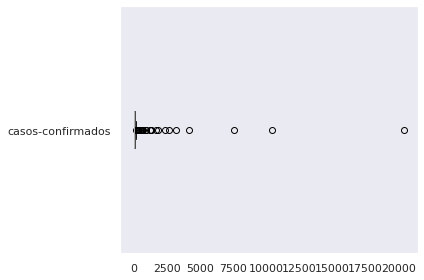

In [20]:
# plotando boxplot para casos confirmados

fig, ax = plt.subplots()

df_dengue.boxplot(['casos-confirmados'], vert=False, grid=False, ax=ax)

plt.tight_layout()

Este caso nos mostra um exemplo perfeito do que são *outliers*, valores fora do boxplot que variam até Vinte mil, fugindo da realidade, uma vez que um aumento drástico no número de casos, por mais possível que seja, é totalmente improvavel que aconteça.  

Há diversas razões para esse tipo de acontecimento, irregularidades na hora do lancamento dos dados no sistema, tanto no passado quanto no futuro, mudança nos métodos e etc. 

Para corrigir essa visualização, vamos determinar uma 'nota de corte' para ir reduzindo a presença de *outliers* e ver como fica a distribuição desse boxplot.



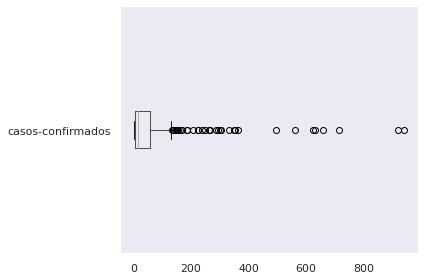

In [ ]:
# plotando boxplot para `casos-confirmados` utilizando o corte arbitrário
fig, ax = plt.subplots()

# selecionando valores menores que Mil
df_dengue.loc[df_dengue['casos-confirmados'] < 1000].boxplot(['casos-confirmados'], 
                                                             vert=False, 
                                                             grid=False, 
                                                             ax=ax)

plt.tight_layout()

Agora podemos ver com um pouco mais de clareza a situação dos dados, porém ainda está muito fora de um padrão, vamos reduzir valor do corte e plotar novamente. 

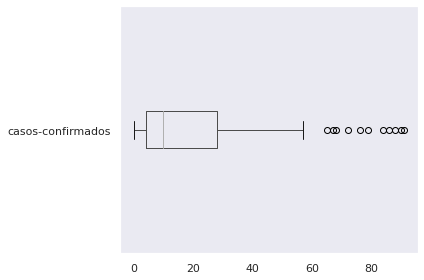

In [21]:
# plotando boxplot para `casos-confirmados` utilizando o corte arbitrário
fig, ax = plt.subplots()

# selecionando valores menores que Cem
df_dengue.loc[df_dengue['casos-confirmados'] < 100].boxplot(['casos-confirmados'], 
                                                             vert=False, 
                                                             grid=False,
                                                             ax=ax)

plt.tight_layout()

Aqui podemos observar melhor a distribuição deste diagrama, podendo ver que os *Outliers* são os valores acima de 60, melhorando nossa concepção a respeito dos dados. 

Como mencionado anteriormente, o formato do diagrama representa a simetria dos valores analisados, e neste casos podemos notar que os valores são assimétricos. 

#### Bonûs
Para nos dar mais um panorama à respeito do caso acima, vamos analisar um método do Python chamado `describe()`.
Este método nos retorna um resumo estatístico do *dataset* que pode conter informações como: 


*   Count - Contagem de valores únicos
*   Mean - Valor médio
*   STD(Standard) - Desvio Padrão
*   Min - Valor mínimo registrado
*   25% - Valor máximo registrado em 25% dos valores crescentes. 
*   50% - Valor máximo registrado em 50% dos valores crescentes. 
*   75% - Valor máximo registrado em 75% dos valores crescentes. 
*   Max - Valor máximo registrado

In [22]:
# utilizando método `describe`
df_dengue.describe()

,casos-confirmados,chuva,temperatura-media,temperatura-mininima,temperatura-maxima
count,204.000000,196.000000,204.000000,204.000000,204.000000
mean,357.539216,116.650000,22.200980,17.679412,25.565196
std,1741.814759,96.631613,2.399363,3.336316,2.249864
min,0.000000,0.800000,16.400000,8.200000,19.100000
25%,6.000000,43.850000,20.100000,15.075000,23.800000
50%,17.500000,86.650000,22.700000,18.150000,26.200000
75%,84.500000,177.925000,24.225000,20.400000,27.200000
max,20428.000000,452.800000,27.200000,23.500000,30.100000


Como podemos observar em casos confirmados, o valor maximo registrado em 75% do dataset é de 84 casos, a média é registrada é 357 casos, o desvio padrão está na casa de 1741 casos, ou seja, os 25% do dataset referente aos maiores valores registrados, estão causando toda essa discrepância na base de dados.

## Gráfico de Dispersão (Scatter Plot)

É um gráfico que representa a relação entre duas variáveis (X e Y) de forma bi-dimensional, utilizando pontos para representar estes valores. 
Este tipo de gráfico pode nos indicar padrões lineares e não-lineares, também pode ser utilizado para identificar *outliers*.

<center><img src="https://www.data-to-viz.com/graph/scatter_files/figure-html/unnamed-chunk-1-1.png" height="300px"></center>


Com o *Scatter Plot* podemos facilmente encontrar correlações entre as variáveis analisadas, se ambas variáveis tendem a aumentar em conjunto, o coeficiente torna positivo, permitindo traçar uma linha média com inclinação para cima. O inverso também ocorre, se uma variável aumenta enquanto a outra diminui, resulta em um coeficiente negativo, indicando uma linha média inclinada para baixo.

Deve-se tomar cuidado para não confundir correlação com causalidade.


### Plotando Scatter Plot

Para este exemplo utilizaremos um conjunto de dados referente à um conjunto habitacional.


In [23]:
# importando dados 
df_housing = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/housing.csv"
)

# conferindo as primeiras entradas
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


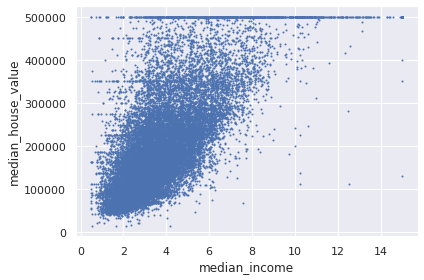

In [24]:
# plotando scatterplot
fig, ax = plt.subplots()

# plotando median_income(salário médio) vs. median_house_value(valor médio da habitaçao)
df_housing.plot.scatter( x='median_income', y='median_house_value', 
                        s=1, # s = ao tamanho do ponto a ser plotado
                        ax=ax)

plt.tight_layout()

#### Regressão Linear com Scatter Plot

Como mencionado anteriormente, a distribuição dos pontos plotados podem nos indicar um padrão de correlação que pode ser positivo ou negativo de acordo com a inclinação da reta à ser traçada. 

Através da biblioteca `seaborn` vamos utilizar o método `regplot()` para fazer a regressão linear destes valores. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


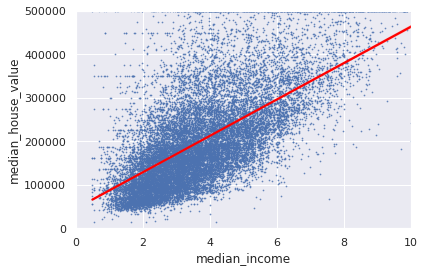

In [25]:
# plotando scatter plot e regressão linear 
fig, ax = plt.subplots()
ax.set_xlim(right=10, left=0)  # define o limite do eixo X
ax.set_ylim(top=500000)
sns.regplot('median_income', 'median_house_value', 
            scatter_kws={"s":0.5},
            line_kws={'color': 'red'},
            data = df_housing,
            ax=ax)

plt.show()

##Violin Plot

Conhecido também como gráfico de violino, esse tipo de visualização gráfica é ideal para analisarmos a distribuição de uma variável. 

<center><img src="https://miro.medium.com/max/520/1*TTMOaNG1o4PgQd-e8LurMg.png" height="400px"></center>

Sendo bastante semelhante ao `Boxplot`, o gráfico de violino é mais informativo. Se tratando de uma combinação entre o Boxplot e o Kernel Density Plot, tendo as mesmas informações do boxplot mostrando um resumo estatístico contendo a média/mediana, e os quartis, outliers, o gráfico de violino nos entrega também a distribuição completa dos dados.

### Plotando Violin Plot

Utilizaremos os dados referentes aos casos de Dengue na cidade de Campinas - SP. 

A biblioteca utilizada será a `seaborn`. A estrutura da Violin Plot é similar à boxplot, porém contam com as curvas que nos indicam a distribuição. 

In [26]:
# conferindo as primeiras entradas
df_dengue.head()

,casos-confirmados,chuva,temperatura-media,temperatura-mininima,temperatura-maxima
data,,,,,
1998-01-01,237,179.2,25.7,20.2,28.1
1998-02-01,331,226.3,25.1,20.0,28.0
1998-03-01,562,149.1,24.8,22.4,27.2
1998-04-01,187,46.4,22.7,18.1,26.0
1998-05-01,32,88.3,19.2,15.7,22.9


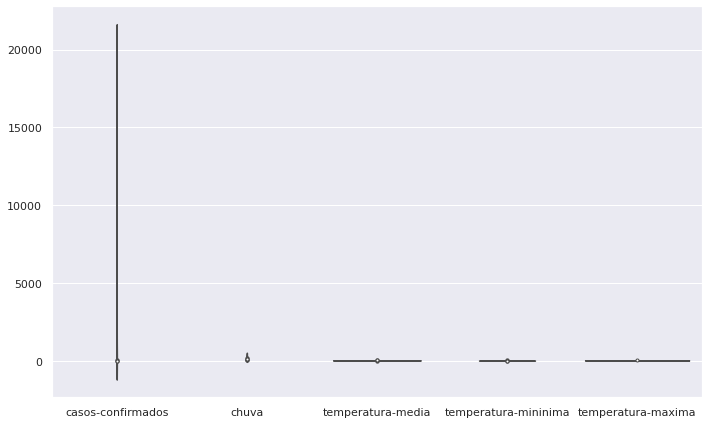

In [27]:
# plotando histograma para temperatura
fig, ax = plt.subplots(figsize=(10,6))

sns.violinplot(data=df_dengue, ax=ax)

plt.tight_layout()

## Gráfico Waffle
Sendo um gráfico de fácil leitura e interpretação, normalmente utilizado por jornais e revistas, este tipo de gráfico tem a capacidade de transmitir informações mais claras do que os gráficos de pizza e até o gráfico de barras. 



<center><img src="https://datavizproject.com/wp-content/uploads/2016/01/Sk%C3%A6rmbillede-2016-01-30-kl.-09.41.29.png""
height="400px"></center>

Utilizaremos a biblioteca `pywaffle` para demonstrar esse gráfico, que permite diversas customizações. Mesmo não estando contido à biblioteca `matplotlib`, a `pywaffle` é totalmente integrada à `matplotlib`. Sendo assim é necessário instalar a biblioteca através do *Conda* (`conda install pywaffle`) ou através do *pip*(`pip install pywaffle`)

In [28]:
# instalando pywaffle
!pip install pywaffle -q

     |████████████████████████████████| 565 kB 5.4 MB/s 


Para demonstrar essa biblioteca, vamos imaginar uma pesquisa realizada por um jornal que constatou a quantidade de veículos *Compactos (44%)
, Motocicletas (38%), e Camionetas (28%)* 
presentes na frota brasileira.

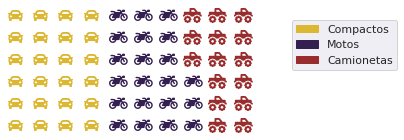

In [29]:
# importando bibliotecas
from pywaffle import Waffle

# plotando Waffle Chart
fig, plt.figure(  
                FigureClass=Waffle,
                rows=6,
                columns=10, 
                colors = ["#DCB732", "#332050", "#992D2D"], # cor de cada ícone
                values={"Compactos": 44,
                        "Motos": 38,
                        "Camionetas": 28},
                icons = ["car" ,"motorcycle", "truck-monster"], # definindo ícones
                legend={"loc": "upper left",  #posicionamento da legenda
                        "bbox_to_anchor": (1.2,1)},
                interval_ratio_x=3, # espaçamento no eixo X
                interval_ratio_y=2.5,    # espaçamento no eixo Y
                icon_size=15
)

fig.set_tight_layout(False)
plt.show()

Para conferir todas as customizações que são possíveis com a biblioteca `Pywaffle`, confira a documentação [neste link](https://pywaffle.readthedocs.io/en/latest/).

## Bar Chart Race

Um gráfico totalmente interativo, que vai além de um gráfico de barras comum, a 'Corrida de Barras' mostra através de um gráfico de barras a evolução de um dado ao longo de um período de tempo, de forma dinâmica onde o tamanho de cada barra vai aumentando ou diminuindo conforme a evolução.

<center><img src="https://www.dexplo.org/bar_chart_race/images/covid19_horiz.gif" height="400px"></center>

Para utilizar esse tipo de visualização precisamos de um conjunto de dados "largo" onde:

* Cada linha representa um período no tempo
* Cada coluna contém valores para uma categoria
* O index contém um elemento de tempo (opcional)



### Plotando Bar Chart Race

Este pacote também não vem instalado por padrão, portanto esse será o primeiro passo a ser feito.

O conjunto de dados que vamos usar vem da [documentação oficial]() dessa biblioteca, e está formatado da forma que precisamos para plotar esse gráfico.

O conjunto mostra o total de mortes por COVID-19 em diversos países.


In [30]:
# instalando biblioteca
!pip install bar_chart_race -q

     |████████████████████████████████| 156 kB 5.2 MB/s 


In [31]:
#importando pacotes
import bar_chart_race as bcr

# carregando dados
df_cvd = bcr.load_dataset('covid19_tutorial')

In [32]:
# plotando gráfico 
bcr.bar_chart_race(df=df_cvd, filename=None)

In [33]:
# criando o plot customizado
bcr.bar_chart_race(
    df=df_cvd, # selecionando os dados
    filename=None, # nomeando o arquivo
    orientation='h', # orientação do gráfico
    sort='desc', # organização 
    n_bars=10, # número de barras
    fixed_order=False, # ordem fixa
    fixed_max=True, # máximo fixo
    steps_per_period=10, # stepos por período
    interpolate_period=False, # interpolar o período
    label_bars=True, # colocar labels nas barras
    bar_size=.95, # tamanho da barra
    period_label={'x': .99, 'y': .25, 'ha': 'right', 'va': 'center'}, # labels dos períodos
    period_fmt='%B %d, %Y', # formato do período
    period_summary_func=lambda v, r: {'x': .99, 'y': .18,
                                      's': f'Total deaths: {v.nlargest(6).sum():,.0f}',
                                      'ha': 'right', 'size': 8, 'family': 'Courier New'}, # resumo do período
    perpendicular_bar_func='median', # função da barra perpendicular
    period_length=500,# tamanho do período
    figsize=(5, 3), # tamanho da período
    dpi=144, 
    cmap='dark12', # esquema de cores
    title='COVID-19 Deaths by Country', # título
    title_size='', # tamamnho do título
    bar_label_size=7, # tamanho do label das barras
    tick_label_size=7, # tamanho do tick do label
    shared_fontdict={'family' : 'Helvetica', 'color' : '.1'}, # definindo a fonte
    scale='linear', # escala dos dados
    writer=None, # escrever no plot
    fig=None, # definir a figura
    bar_kwargs={'alpha': .7}, # kwargs
    filter_column_colors=False)  # filtrar cores das colunas 

findfont: Font family ['Courier New'] not found. Falling back to DejaVu Sans.


In [34]:
# salvando como HTLM
bcr_html = bcr.bar_chart_race(df=df_cvd, filename = 'bar_chart_race.html')

## iPyWidgets - Interagindo com os Plots

Um meio de inovar um notebook, é tornando ele interativo, o que pode ser essencial na hora de trazer resultados para um projeto.

A biblioteca [iPyWidgets](https://ipywidgets.readthedocs.io/en/latest/), através de um framework chamado *Comm Framework* que permite o *Kernel* se comunique com o *Front End* através de mensagens JSON, permitindo que através do front end sejam feitas modificações que alteram instantaneamente o resultado do plot, sem a necessidade de rodar a célula novamente.

<center><img src="https://ipywidgets.readthedocs.io/en/latest/_images/WidgetArch.png" height="400px"></center>

A função `interact` (`ipywidgets.interact`) cria uma interface de usuário que permite a interação com o código e os dados. De forma básica, o `interact` cria uma interface que controla os argumentos de uma função, e então chama a função com os argumentos selecionados através da UI. Sendo assim, para utilizar é necessario criar previamente uma função a qual você queira explorar.

<center><img src="https://ipywidgets.readthedocs.io/en/stable/_images/WidgetModelView.png" height="400px"></center>


É possível criar diversos tipos de *Widgets* para interagir da forma que for necessária, podendo ser do tipo checkbox, slider, select, string widgets, color picker, file upload. 

Para cada *Widget*, um tipo de argumento é passado para a função.


In [1]:
# instalando pacotes
!pip install ipywidgets -q

A documentação oficial da biblioteca informa que o código abaixo seja utilizado para que as interações estejam disponíveis em Jupyter Notebooks. O ambiente Google Colab não exige esse processo, porém ao rodar um notebook de forma local, é necessário que seja feito. Para mais informações, confira a documentação oficial da biblioteca.


In [3]:
# Extensão necessária para Jupyter Notebook 

#jupyter nbextension enable --py widgetsnbextension

Agora com os pacotes devidamente instalados, vamos fazer a importação dos pacotes necessários. Importaremos algumas funções específicas do pacote, e também o pacote inteiro, para facilitar o código.

In [4]:
# importando pacotes 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed, interact_manual
import ipywidgets as widgets

### Slider
Agora vamos começar a criar funções, começando por uma função normal.

Podemos ver que ao chamar a função, passamos um parâmetro que irá tomar o lugar de `x`, podemos alterar esse valor e rodar a função novamente, para que seja gerado outro `plot`. 

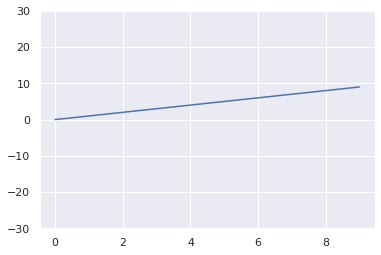

In [15]:
# criando função
def f(x):
    plt.plot(np.arange(0,10), x*np.arange(0,10))
    plt.ylim(-30,30)

# chamando a função
f(1)

Agora vamos chamar a função que definimos anteriormente, porém com a função `interact` do `ipywidget`. 
Vamos passar como argumento a função, e o range de parâmetros que nosso `x` pode assumir, sendo `interact(Função, x=(Mín, Max, Step)`.

Após definir os parâmetros, basta rodar e utilizar o slider criado. A biblioteca ao ver que estamos utilizando uma entrada do tipo `int`, entende que um `slider` seria a UI mais apropriada. 

In [19]:
# chamando a função interact com os devidos parâmetros
interact(f, x=(-10, 20, 1))

interactive(children=(IntSlider(value=5, description='x', max=20, min=-10), Output()), _dom_classes=('widget-i…

<function __main__.f>

#Checkbox

Se utilizarmos um `bool` como parâmetro x, dentro do `interact`, a biblioteca vai gerar um `checkbox` ao invés de um `slider`, sendo a caixa preenchida `True`, e não preenchida `False`.


In [21]:
# checkbox para booleanos
rands = np.random.rand(100)
def f(x):
    if x:
      plt.plot(rands, 'b')
    else:
      plt.plot(rands, 'r')
interact(f, x=True)
interact(f, x=True)


interactive(children=(Checkbox(value=True, description='x'), Output()), _dom_classes=('widget-interact',))

interactive(children=(Checkbox(value=True, description='x'), Output()), _dom_classes=('widget-interact',))

<function __main__.f>

###Decorator

Outro widget interessante é o `decorator`, que tem o papel de decorar nosso plot. Neste exemplo vamos utiliza-lo para alterar o título do plot.

In [32]:
# decorator. Identifica a string e entrega um textbox 

@interact(Título= 'Título do Plot')
def titulo_plot(Título):
  plt.title(Título) 

interactive(children=(Text(value='Título do Plot', description='Título'), Output()), _dom_classes=('widget-int…

###Multiple Widgets

É possível utilizar mais de um widget por plot. Uma vez que os parâmetros foram determinados na função, basta chamá-los no `interact`. 

Aqui mostramos que ele define automaticamente um range e um step, mas você está totalmente livre para selecionar os valores desejados.


In [42]:
# multiplos widgets

def f(a,b):
    plt.plot(np.arange(0,10), a*np.power(np.arange(0,10), b))
    plt.title("Lei da Potência: $x=ay^b$")
interact(f, a=2, b=(0,10,1))

interactive(children=(IntSlider(value=2, description='a', max=6, min=-2), IntSlider(value=5, description='b', …

<function __main__.f>

Como podemos observar acima, a função `interact` conta com o parâmetro `f` da função original, e as definições dos parâmetros `a` e `b`. 

Quando se coloca um valor específico como em `a`, o widget vai vir por padrão com aquele valor já estabelecido, e o range será igual a 2 vezes o valor, neste caso onde `a=2` ele começa com 2 pré definido, e um range que vai de -2 até 6. 

Já em `b`, como se trata de uma potência, nesse tipo de função onde se encontra, não é possível que o valor seja negativo, resultando em erro caso contrário, portanto o range deve vir pré definido, evitando problemas futuros.

###Valor fixo

Dependendo do caso, pode ser necessário tornar o valor de um dos parâmetros fixo, basta inserir o `b=fixed()` na função interact, veja a seguir:

In [48]:
# valores fixos
def f(a,b):
    plt.plot(np.arange(0,10), a*np.power(np.arange(0,10), b))
    plt.title("Lei da Potência: $x=ay^b$")
interact(f, a=1, b=fixed(2))

interactive(children=(IntSlider(value=1, description='a', max=3, min=-1), Output()), _dom_classes=('widget-int…

<function __main__.f>

In [49]:
# valores fixo, porem com `b` já pré definido na função original
def f(a):
    plt.plot(np.arange(0,10), a*np.power(np.arange(0,10), 2))  # final da função determina o valor 2 como `b`
    plt.title("Lei da Potência: $x=ay^b$")
interact(f, a=1)



interactive(children=(IntSlider(value=1, description='a', max=3, min=-1), Output()), _dom_classes=('widget-int…

<function __main__.f>

### Dropdown

O Dropdown Widget cria um menu com uma lista de itens para selecionar, para a bilbioteca reconhecer essa estrutura, basta passar uma lista como parâmetro. 

Neste exemplo a função vai receber o parâmetro cor através do interact.

A cor faz parte de uma lista de cores, que será chamada dentro da função `interact`. 


In [50]:
# dropdown de lista

def f(color):
    plt.plot(np.arange(0,10), np.power(np.arange(0,10), 5), c=color)
    plt.title("Lei da Potência: $x=ay^b$")
colors=['Red','Blue','Green']
interact(f, color=colors)

interactive(children=(Dropdown(description='color', options=('Red', 'Blue', 'Green'), value='Red'), Output()),…

<function __main__.f>

Uma outra maneira de configurar um menu dropdown, é atraves de dicionários. Podemos definir uma lista de `int`, interagir com o plot a partir de um dropdown, como se fosse um slider.

Através de dicionários é possível escrever o nome do número, e fazer com que a função receba um `int`. 

Basta informar as opções do dropdown como chaves, e os valores à receber pela função como valores.

Ao fim basta determinar o dicionário como parâmetro da função `interact`



In [53]:
# dropdown dicionários

def f(b, color):
    plt.plot(np.arange(0,10), np.power(np.arange(0,10), b), c=color)
    plt.title("Lei da Potência: $x=ay^b$")
powers = {"One": 1, "Two": 2, "Three": 3}
colors={'Vermelho':'Red', 'Azul':'Blue', 'Verde':'Green'}

interact(f, b=powers, color=colors)

interactive(children=(Dropdown(description='b', options={'One': 1, 'Two': 2, 'Three': 3}, value=1), Dropdown(d…

<function __main__.f>